# Import Data

In [1941]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
path1=r'D:\Python\Titanic\test.csv'
path2=r'D:\Python\Titanic\train.csv'
train_df=pd.read_csv(path2)
test_df=pd.read_csv(path1)

In [1942]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [1943]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1944]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1945]:
print(train_df.info())
print('*'*50)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket      

In [1946]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1947]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Analyze by pivoting features

In [1812]:
# factor pclass affect the survivied
train_df[['Survived','Pclass']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


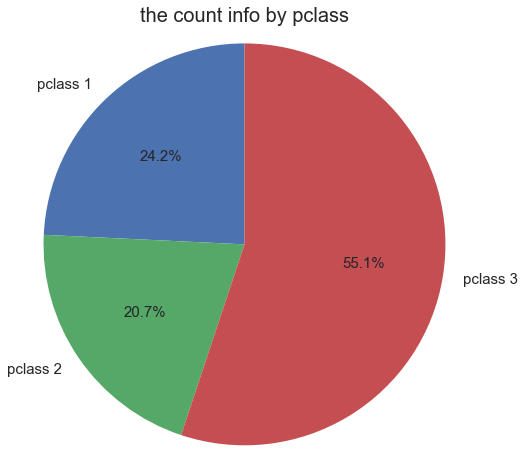

In [1967]:
class_count1=train_df.groupby('Pclass')['Survived'].count()


fig=plt.figure(figsize=(8,8))
labels=['pclass 1','pclass 2','pclass 3']
plt.pie(class_count1,labels=labels,autopct='%1.1F%%',startangle=90,textprops={"fontsize":15})
plt.axis('equal')
plt.title('the count info by pclass',fontsize=20)
plt.show()

In [1972]:
# factor sex affect the survivied
sex_info=train_df[['Sex','Survived']].groupby(by='Sex').mean().sort_values(by='Survived',ascending=False)
sex_info

,Survived
Sex,
female,0.742038
male,0.188908


In [1987]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [1976]:
train_df[['Parch','Survived']].groupby(by=['Parch']).mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


# Analyze by visualizing data


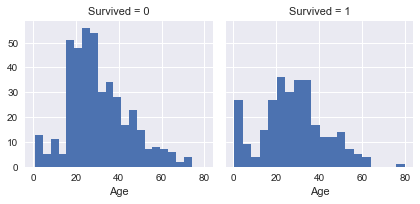

In [1816]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)
plt.show()

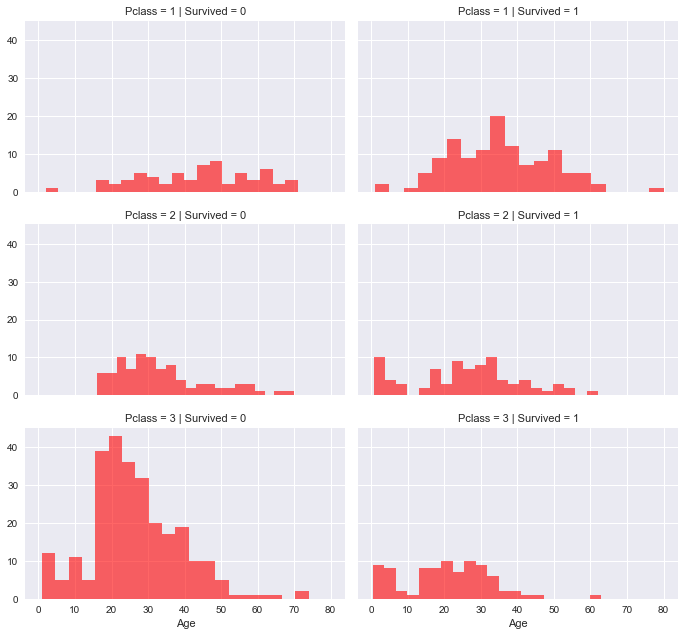

In [1997]:
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',size=3,aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.6,bins=20,color='red')
grid.add_legend()
plt.show()

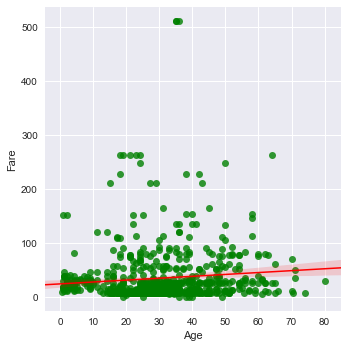

In [1818]:
sns.lmplot('Age','Fare',train_df,scatter_kws={'marker':'*','color':'green'},line_kws={'linewidth':1.5,'color':'red'})
plt.show()

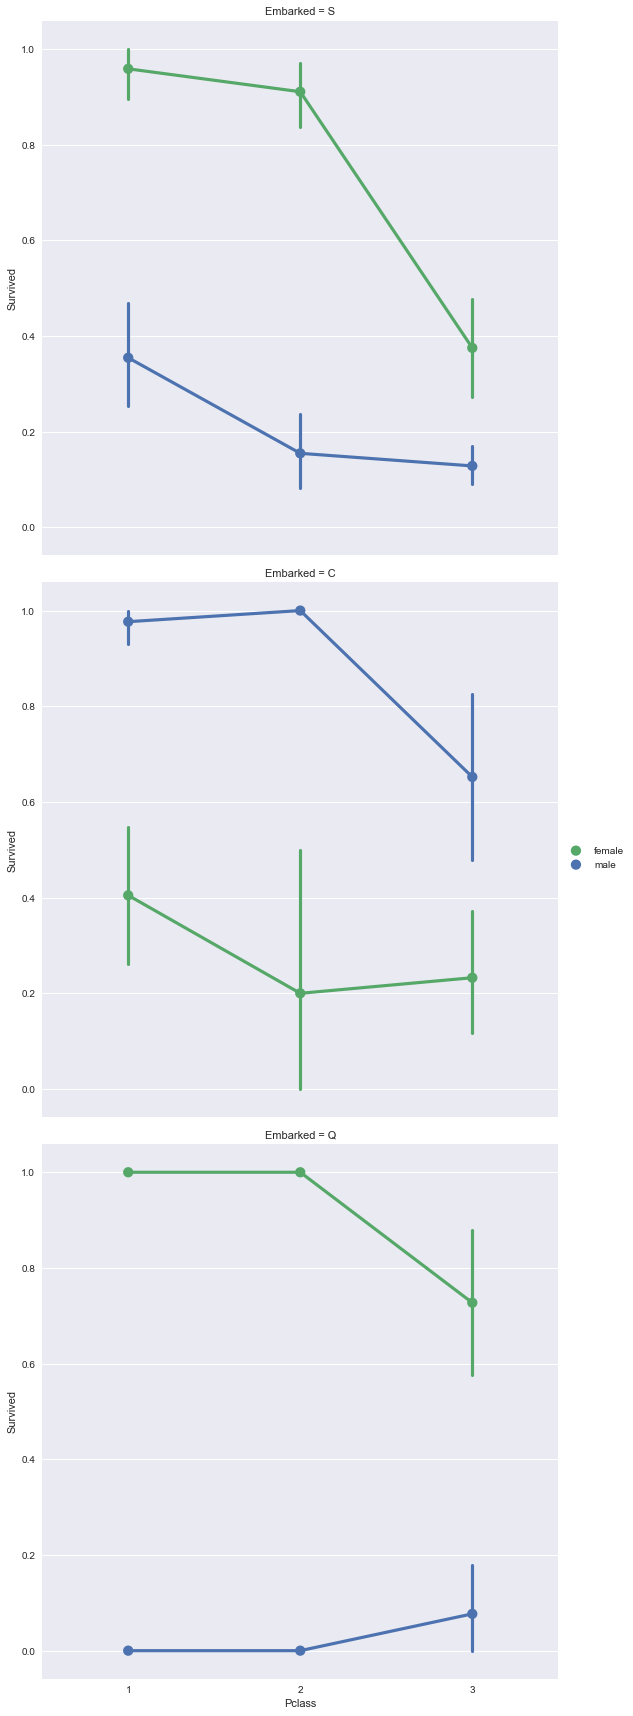

In [2003]:
grid=sns.FacetGrid(train_df,row='Embarked',size=8)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()
plt.show()

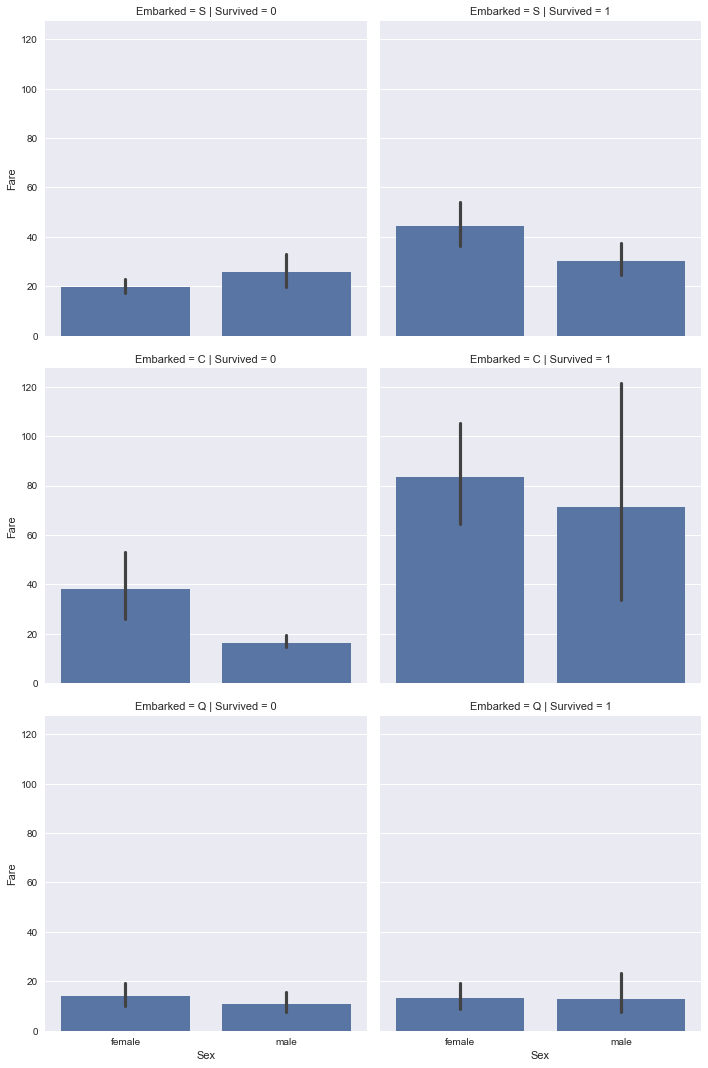

In [2004]:
grid=sns.FacetGrid(train_df,row='Embarked',col='Survived',size=5)
grid.map(sns.barplot,'Sex','Fare')
plt.show()

In [2005]:
print ('Before',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before (891, 12) (418, 11) (891, 10) (418, 9)


In [2006]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)


In [2007]:
combine=[train_df,test_df]
print ('Before',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before (891, 10) (418, 9) (891, 10) (418, 9)


In [2009]:
data=pd.concat([train_df,test_df])
data.shape
data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0


In [2010]:
kk=[]
def tiqu(ti):
    kk=ti.split(',')[1]
    kk=kk.split('.')[0]
    kk=str(kk).lstrip()
    return kk
data['title']=data.Name.apply(tiqu)

In [2011]:
set(data.title)

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [2012]:
pd.crosstab(data.title,data.Sex)

Sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [2013]:
data['title']=data['title'].replace(['Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Dona',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'],'rare')

In [2014]:
set(data.title)

{'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'rare'}

In [2015]:
data['title']=data['title'].replace(['Mlle','Mrs'],'Miss')
data['title']=data['title'].replace('Mme','Mrs')


In [2016]:
data.title.isnull().sum()

0

In [2017]:
set(data.title)

{'Master', 'Miss', 'Mr', 'Mrs', 'rare'}

In [2018]:
data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,Miss
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,Miss
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,Mr


In [2019]:
data['title']=data.title.map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "rare": 5})

In [2020]:
data.title=data.title.astype(int)

In [2021]:
data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,2
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,2
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,2
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,1


In [2022]:
data=data.drop(['Name','PassengerId'],axis=1)

In [2023]:
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,title
0,22.0,S,7.2500,0,3,male,1,0.0,1
1,38.0,C,71.2833,0,1,female,1,1.0,2
2,26.0,S,7.9250,0,3,female,0,1.0,2
3,35.0,S,53.1000,0,1,female,1,1.0,2
4,35.0,S,8.0500,0,3,male,0,0.0,1


In [2024]:
data.Sex=data.Sex.apply(lambda x:1 if x=='female' else 0)

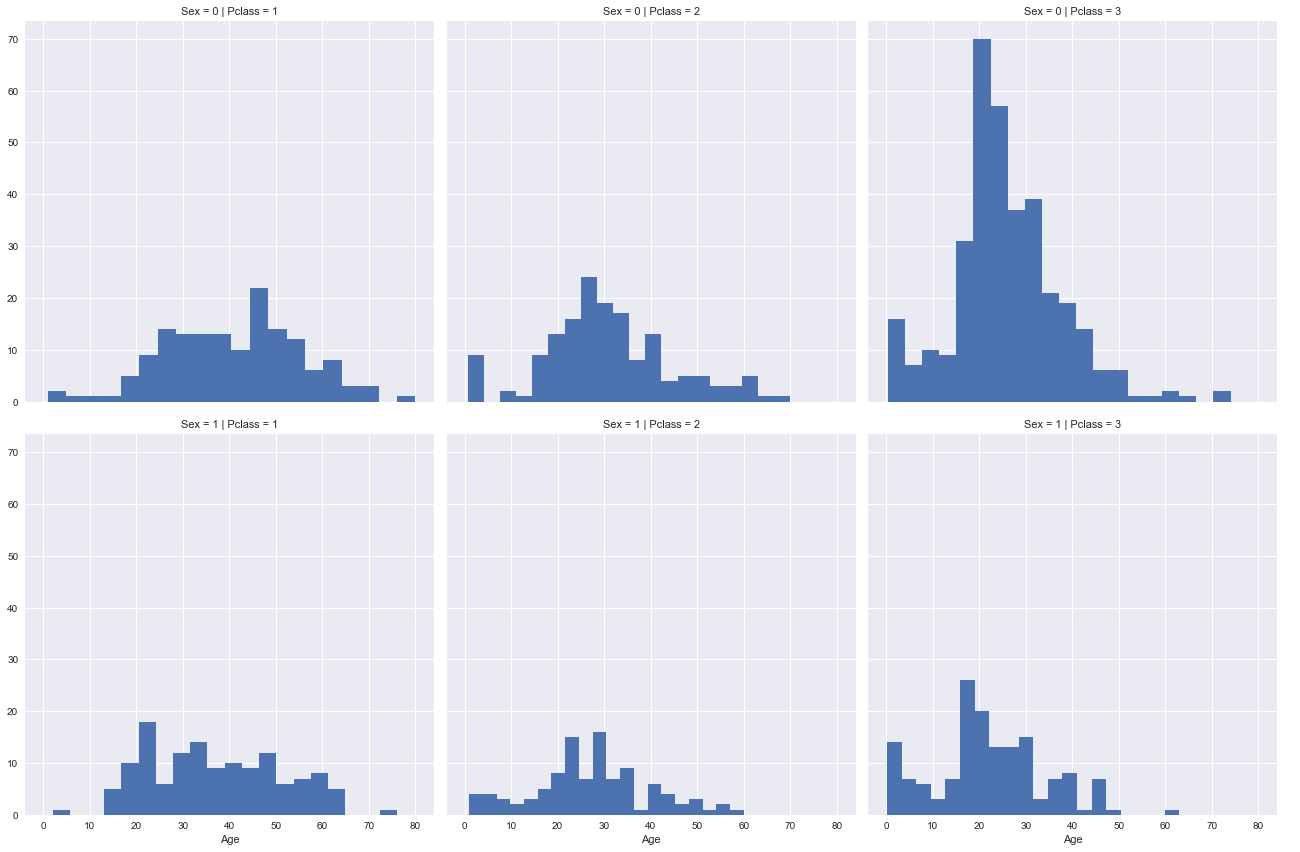

In [2026]:
grid=sns.FacetGrid(data,col='Pclass',row='Sex',size=6)
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()
plt.show()

In [2030]:
for i in range(0,2):
    for j in range(1,4):
        data.loc[(data.Age.isnull())&(data.Sex==i) &(data.Pclass==j),'Age']=data.loc[(data.Sex==i) &(data.Pclass==j),'Age'].median()

In [2036]:
data.Age.isnull().sum()

0

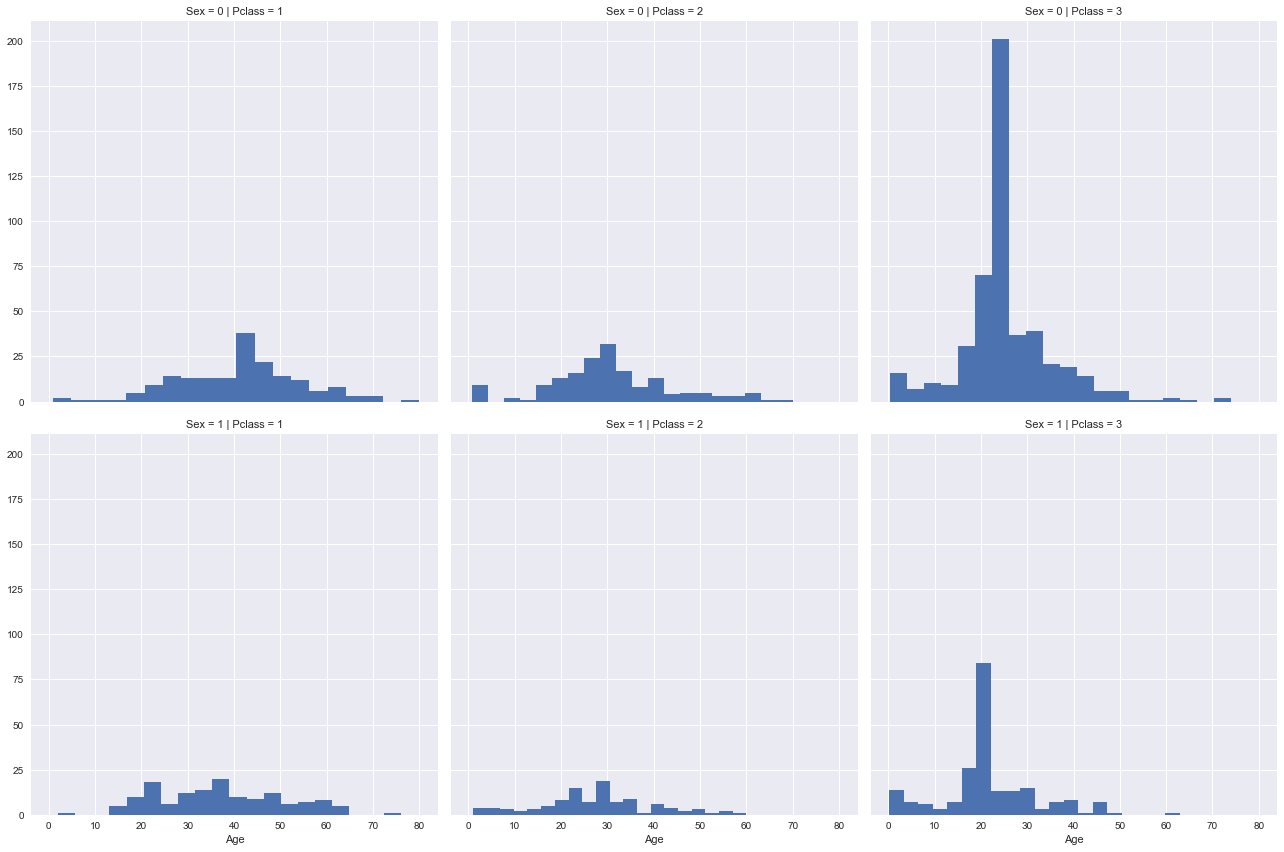

In [2037]:
grid=sns.FacetGrid(data,col='Pclass',row='Sex',size=6)
grid.map(plt.hist,'Age',bins=20)
plt.show()

In [2038]:
data.Age=data.Age.astype(int)

In [2039]:
data['duan']=pd.cut(data.Age,5)

In [2040]:
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,title,duan
0,22,S,7.2500,0,3,0,1,0.0,1,"(16.0, 32.0]"
1,38,C,71.2833,0,1,1,1,1.0,2,"(32.0, 48.0]"
2,26,S,7.9250,0,3,1,0,1.0,2,"(16.0, 32.0]"
3,35,S,53.1000,0,1,1,1,1.0,2,"(32.0, 48.0]"
4,35,S,8.0500,0,3,0,0,0.0,1,"(32.0, 48.0]"


In [2041]:
data[['duan','Survived']].groupby('duan').mean()

,Survived
duan,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [2042]:
k=[]
def agead(s):
    if s<=16:
        return 1
    elif s<=32:
        return 2
    elif s<=48:
        return 3
    elif s<=64:
        return 4
    else:
        return 5
    
data['Age']=data.Age.apply(agead)
data.duan.unique()

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [2045]:
data.drop('duan',axis=1,inplace=True)
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,title
0,2,S,7.2500,0,3,0,1,0.0,1
1,3,C,71.2833,0,1,1,1,1.0,2
2,2,S,7.9250,0,3,1,0,1.0,2
3,3,S,53.1000,0,1,1,1,1.0,2
4,3,S,8.0500,0,3,0,0,0.0,1


In [2046]:
data['familysize']=data.SibSp+data.Parch+1

In [2047]:
data[['familysize','Survived']].groupby('familysize').mean()

,Survived
familysize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [2048]:
data['isalone']=0
data.loc[data.familysize==1,'isalone']=1
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,title,familysize,isalone
0,2,S,7.2500,0,3,0,1,0.0,1,2,0
1,3,C,71.2833,0,1,1,1,1.0,2,2,0
2,2,S,7.9250,0,3,1,0,1.0,2,1,1
3,3,S,53.1000,0,1,1,1,1.0,2,2,0
4,3,S,8.0500,0,3,0,0,0.0,1,1,1


In [2049]:
data.drop(['Parch','SibSp','familysize'],axis=1,inplace=True)

In [2050]:
data.head()


,Age,Embarked,Fare,Pclass,Sex,Survived,title,isalone
0,2,S,7.2500,3,0,0.0,1,0
1,3,C,71.2833,1,1,1.0,2,0
2,2,S,7.9250,3,1,1.0,2,1
3,3,S,53.1000,1,1,1.0,2,0
4,3,S,8.0500,3,0,0.0,1,1


In [2051]:
data['age*class']=data.Age*data.Pclass

In [2052]:
data[['Age','Pclass','age*class']].head()

,Age,Pclass,age*class
0,2,3,6
1,3,1,3
2,2,3,6
3,3,1,3
4,3,3,9


In [2063]:
data['Embarked'].fillna(data.Embarked.mode()[0],inplace=True)
data.Embarked.isnull().sum()

0

In [2064]:
data[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
1,0.553571
2,0.389610
3,0.339009


In [2065]:
data['Fare'].fillna(data.Fare.mean(),inplace=True)

In [2066]:
data.isnull().sum()

Age            0
Embarked       0
Fare           0
Pclass         0
Sex            0
Survived     418
title          0
isalone        0
age*class      0
fare           0
dtype: int64

In [2067]:
data['Embarked']=data['Embarked'].apply(lambda x:1 if x=='C' else 2 if x=='Q' else 3 )

In [2068]:
data['fare']=pd.qcut(data.Fare,4)

In [2069]:
data[['fare','Survived']].groupby(by='fare').mean()

,Survived
fare,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.600000


In [2070]:
def fa(s):
    if s<=7.896:
          return 1
    if s<=14.454:
          return 2
    if s<=31.275:
          return 3
    else:
          return 4
data.fare=data.Fare.apply(fa)
        

In [2071]:
data.head()

,Age,Embarked,Fare,Pclass,Sex,Survived,title,isalone,age*class,fare
0,2,3,7.2500,3,0,0.0,1,0,6,1
1,3,3,71.2833,1,1,1.0,2,0,3,4
2,2,3,7.9250,3,1,1.0,2,1,6,2
3,3,3,53.1000,1,1,1.0,2,0,3,4
4,3,3,8.0500,3,0,0.0,1,1,9,2


In [2072]:
data.drop('Fare',inplace=True,axis=1)

In [2073]:
data.head()

,Age,Embarked,Pclass,Sex,Survived,title,isalone,age*class,fare
0,2,3,3,0,0.0,1,0,6,1
1,3,3,1,1,1.0,2,0,3,4
2,2,3,3,1,1.0,2,1,6,2
3,3,3,1,1,1.0,2,0,3,4
4,3,3,3,0,0.0,1,1,9,2


# Model, predict and solve


In [2075]:
data1=data[data['Survived']==0]
data2=data[data['Survived']==1]


In [2076]:
data1.head()

,Age,Embarked,Pclass,Sex,Survived,title,isalone,age*class,fare
0,2,3,3,0,0.0,1,0,6,1
4,3,3,3,0,0.0,1,1,9,2
5,2,3,3,0,0.0,1,1,6,2
6,4,3,1,0,0.0,1,1,4,4
7,1,3,3,0,0.0,4,0,3,3


In [2077]:
data2.head()

,Age,Embarked,Pclass,Sex,Survived,title,isalone,age*class,fare
1,3,3,1,1,1.0,2,0,3,4
2,2,3,3,1,1.0,2,1,6,2
3,3,3,1,1,1.0,2,0,3,4
8,2,3,3,1,1.0,2,0,6,2
9,1,3,2,1,1.0,2,0,2,3


In [2078]:
train=pd.concat([data1,data2])

In [2079]:
len(train)

891

# LR 回归

In [2080]:
train_x=train.drop(['Survived'],axis=1)
train_y=train['Survived']

In [2081]:
test=data.iloc[len(train_df):,]

In [2082]:
test_x=data.drop('Survived',axis=1)

In [2083]:
logreg=LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [2084]:
test_y=logreg.predict(test_x)

In [2085]:
test_y

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [2086]:
logreg.score(X=train_x,y=train_y)

0.80471380471380471

In [2087]:
test_x.columns

Index(['Age', 'Embarked', 'Pclass', 'Sex', 'title', 'isalone', 'age*class',
       'fare'],
      dtype='object')

In [2088]:
kk=data.corr() #相关性

In [2089]:
kk.Survived.sort_values(ascending=False)

Survived     1.000000
Sex          0.543351
title        0.334890
fare         0.303336
Age         -0.037059
isalone     -0.203367
Pclass      -0.338481
age*class   -0.352157
Embarked          NaN
Name: Survived, dtype: float64

# SVC 支持向量机

In [2090]:
svc=SVC()


In [2091]:
svc.fit(train_x,train_y)
test_y2=svc.predict(test_x)

In [2092]:
test_y2

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [2093]:
svc.score(train_x,train_y)

0.8204264870931538

# KNN K近邻算法

In [2094]:
knn=KNeighborsClassifier(n_neighbors =4)

In [2095]:
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [2096]:
test_y3=knn.predict(test_x)
test_y3

array([ 0.,  1.,  0., ...,  0.,  0.,  0.])

In [2097]:
knn.score(train_x,train_y)

0.8125701459034792

# 贝叶斯分类算法

In [2098]:
gaussian = GaussianNB()
gaussian.fit(train_x,train_y)
test_y4 = gaussian.predict(test_x)
test_y4

array([ 0.,  1.,  1., ...,  0.,  0.,  1.])

In [2099]:
gaussian.score(train_x,train_y)

0.74298540965207627

# 汇总

In [2100]:
summary=pd.DataFrame({'model':['LR','kNN','GNB'],
                    'score':[logreg.score(X=train_x,y=train_y),knn.score(train_x,train_y),gaussian.score(train_x,train_y)]})

In [2101]:
summary

,model,score
0,LR,0.804714
1,kNN,0.812570
2,GNB,0.742985
